In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загрузим данные из файла "gender.csv" и выведим первые 5 строк, чтобы убедится в корректности загрузки файла

In [3]:
data = pd.read_csv('gender.csv')
data.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


Проверим есть ли в файле пропущенные значения

In [4]:
data.isna().sum()

Количество больничных дней    0
Возраст                       0
Пол                           0
dtype: int64

Посмотрим на данные, с помощью метода describe()

In [5]:
data.describe()

,Количество больничных дней,Возраст
count,237.000000,237.000000
mean,3.257384,40.181435
std,1.807821,6.875157
min,0.000000,23.000000
25%,2.000000,36.000000
50%,3.000000,41.000000
75%,4.000000,45.000000
max,8.000000,60.000000


Проверим гипотезу, что мужчины пропускают более 2 рабочих дней чаще, чем женщины.
Сделаем выборки по заданым условиям. 

In [6]:
men = data[data['Пол'] == 'М']
women = data[data['Пол'] == 'Ж']

men_days = men[men['Количество больничных дней'] > 2]
women_days = women[women['Количество больничных дней'] > 2]

Посмотрим на их распределения по графику. 

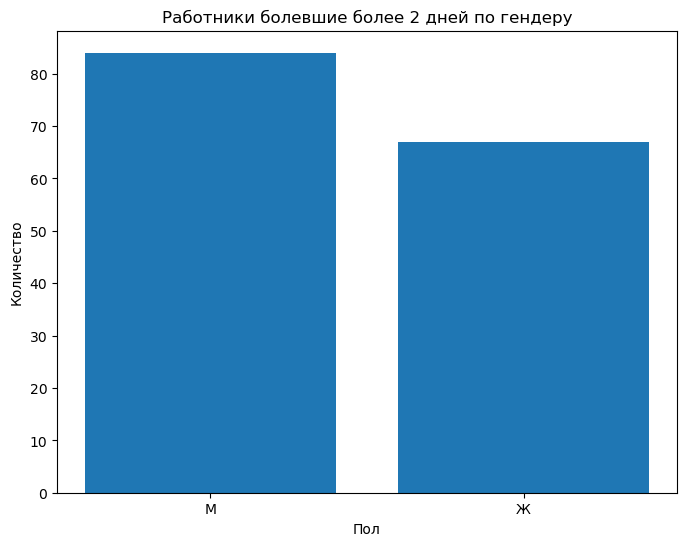

In [7]:
plt.figure(figsize=(8, 6))
plt.bar(['М', 'Ж'], [len(men_days), len(women_days)])
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.title('Работники болевшие более 2 дней по гендеру')
plt.show()

С помощью функции ttest_ind из библиотеки scipy.stats выполненим t-теста на независимых выборках и определеним статистическую значимости различий и подтвердим или опровергним нашу гипотезу.

Зададим alpha - критический уровень статистической значимости, если p-value окажется меньше него - отвегнем гипотезу

In [8]:
alpha = 0.05

In [9]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(men_days['Количество больничных дней'], women_days['Количество больничных дней'])
if p_value < alpha:
    print("Гипотеза отвергается: Нет значимого различия в количестве пропущенных рабочих дней между мужчинами и женщинами")
else:
    print("Гипотеза подтверждается: Мужчины пропускают рабочие дни значимо чаще женщин")

Гипотеза подтверждается: Мужчины пропускают рабочие дни значимо чаще женщин


Выведим суммы пропущенных дней по болезням, чтобы убедиться, что мы сделали правильный вывод

In [10]:
print(f"Сумма дней пропущенных по болезни у женщин (более 2 дней):{women_days['Количество больничных дней'].sum()}") 
print(f"Сумма дней пропущенных по болезни у мужчин (более 2 дней):{men_days['Количество больничных дней'].sum()}")

Сумма дней пропущенных по болезни у женщин (более 2 дней):284
Сумма дней пропущенных по болезни у мужчин (более 2 дней):364


Теперь перейдем к проверки второй гипотезы, что работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.

Сделаем снова выборки по заданым условиям.

In [11]:
older_employees = data[data['Возраст'] > 35]
young_employees = data[data['Возраст'] <= 35]

older_days = older_employees[older_employees['Количество больничных дней'] > 2]
young_days = young_employees[young_employees['Количество больничных дней'] > 2]

Посмотрим на распределения работников разных возрастов по графику.

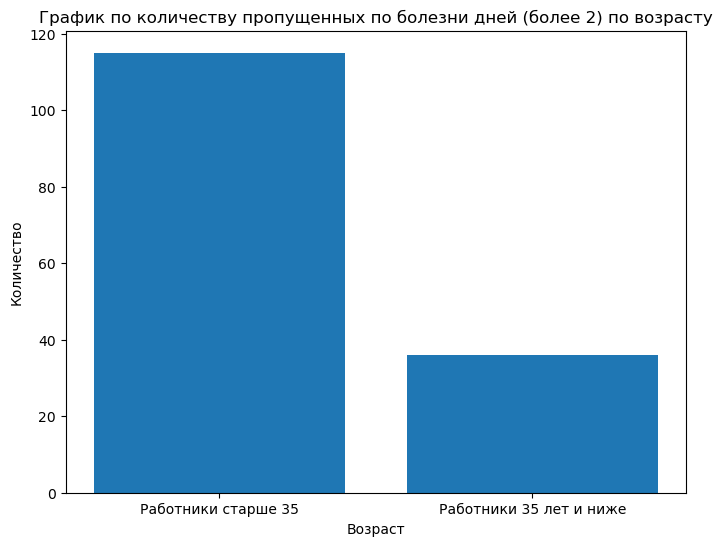

In [12]:
plt.figure(figsize=(8, 6))
plt.bar(['Работники старше 35', 'Работники 35 лет и ниже'], [len(older_days), len(young_days)])
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('График по количеству пропущенных по болезни дней (более 2) по возрасту')
plt.show()

Также с помощью t-test подтвердим или опровергним нашу гипотезу. Параметр alpha оставим тем же.

In [13]:
t_statistic, p_value = ttest_ind(older_days['Количество больничных дней'], young_days['Количество больничных дней'])
if p_value < alpha:
    print("Гипотеза отвергается: Нет значимого различия в количестве пропущенных рабочих дней между старыми и молодыми сотрудниками")
else:
    print("Гипотеза подтверждается: Более старые сотрудники пропускаю рабочие дни по болезни чаще")

Гипотеза подтверждается: Более старые сотрудники пропускаю рабочие дни по болезни чаще


Выведим суммы пропущенных дней по болезням, чтобы убедиться, что мы сделали правильный вывод

In [14]:
print(f"Сумма дней пропущенных по болезни у более старых сотрудников(более 2 дней):{older_days['Количество больничных дней'].sum()}") 
print(f"Сумма дней пропущенных по болезни у более молодых сотрудников(более 2 дней):{young_days['Количество больничных дней'].sum()}")

Сумма дней пропущенных по болезни у более старых сотрудников(более 2 дней):488
Сумма дней пропущенных по болезни у более молодых сотрудников(более 2 дней):160


__Вывод:__
1. Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.
2. Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.

In [15]:
men = data[(data['Пол'] == 'М') & (data['Количество больничных дней'] == 2)]